In [1]:
import numpy as np
import scipy as sci
from fastai.vision.all import *
import math
import matplotlib.pyplot as plt

In [2]:
import scipy.fft as fft

In [3]:
# FUNCTION`S CREATED FROM   'INTRO'
def middle_section(arr):
    """
    for plt.plot. Can be colored or not.
    """
    mid_row=int((arr.shape)[0]/2)
    if len(arr.shape) == 3 :
        return (arr[mid_row,:,0:1]).flatten()
    else:
        return((arr[mid_row,:]).flatten())
def convolve_2d(arr,flt):
    """
    filter designed to be 3x3
    """
    conv=np.empty(((arr.shape)[0]-2,(arr.shape)[1]-2))
    for i in (range(arr.shape[0]))[1:-1]:
        in1=np.convolve(arr[i-0,:],flt[0,:],'valid')
        in2=np.convolve(arr[i,:],flt[1,:],'valid')
        in3=np.convolve(arr[i+1,:],flt[2,:],'valid')
        conv[i-1]=(in1+in2+in3)
    return conv
def im_asrankn(arr,n):
    """
    pull the first n rank-1 part of the array. with SVD.
    designed for NON-colored image
    """
    U,E,V=np.linalg.svd(arr)
    ans=np.zeros(arr.shape)
    for i in range(n):
        ans+=(U[:,i:i+1]@V[i:i+1,:])*E[i]
    return ans
def gaussian_filter2d(piv,mean=0,sigma=1):
    loc=np.square((np.arange(-(piv-1)/2,((piv-1)/2)+1)).reshape((piv,1)))
    temp=np.concatenate(piv*[loc],axis=1)
    x=temp+temp.T
    return (1/(np.sqrt(2*np.pi)*sigma))*np.exp((-1*np.square(x-mean))/(2*np.square(sigma)))


In [4]:
rng=np.random.default_rng(seed=42)

coco=untar_data(URLs.COCO_TINY)

coco_impath=coco.ls()[1]

coco_imgs=coco_impath.ls()

ccarr1=np.array(Image.open(coco_imgs[19]))

ccarr2=np.array(Image.open(coco_imgs[79]))

d1cc=ccarr1[:,:,2]

In [4]:
d2cc=ccarr2[:,:,2]

In [5]:
U,E,VT=np.linalg.svd(d1cc)

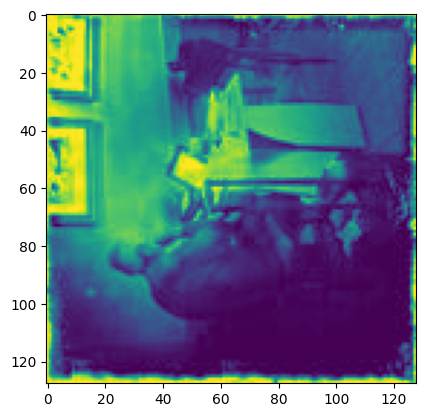

In [6]:
plt.imshow(d1cc.T)

In [6]:
deneme=np.sum(sci.fft.fft(VT.T[:,:100]@np.diag(E)[:100],axis=0),axis=1)

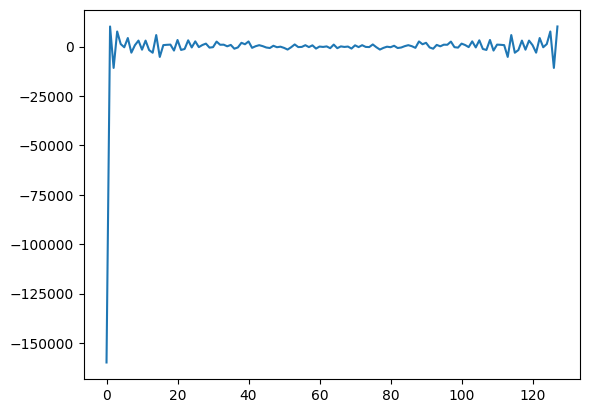

In [7]:
plt.plot(np.real(deneme))

In [8]:
flt=np.zeros(100)
flt[43:48]=1/5

In [9]:
x=rng.normal(20,2,100)

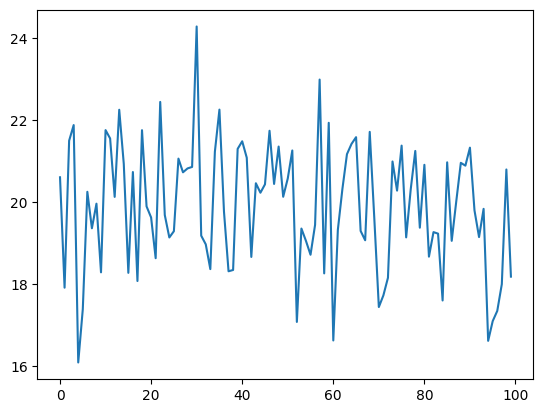

In [10]:
plt.plot(x)

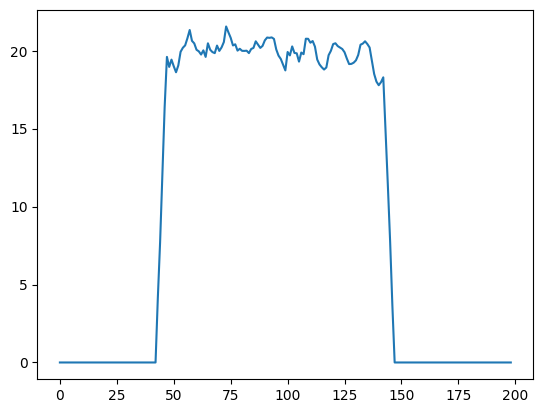

In [11]:
plt.plot(np.convolve(x,flt))

/home/ozkanib20/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


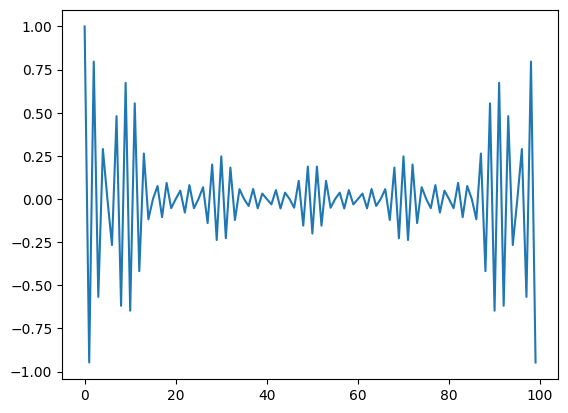

In [12]:
ffilt=sci.fft.fft(flt)
plt.plot(ffilt)

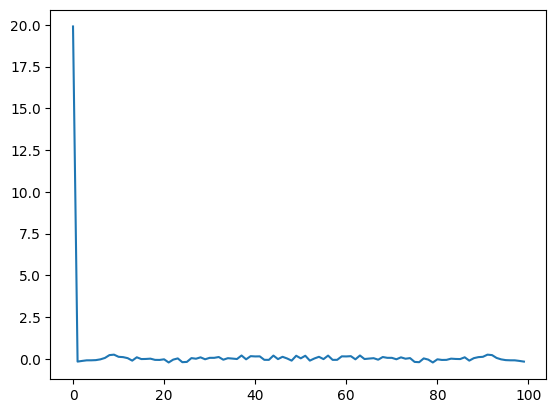

In [13]:
ffx=sci.fft.ifft(x)
plt.plot(ffx)

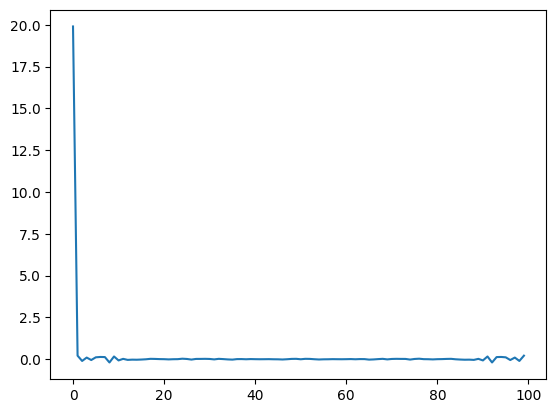

In [14]:
ans=ffilt*ffx
plt.plot(ans)

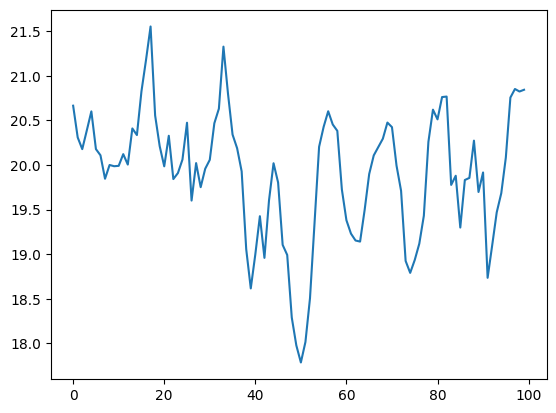

In [15]:
plt.plot(sci.fft.ifft(ans)*100)

In [16]:
x=np.array(([1,5],[9,18]))

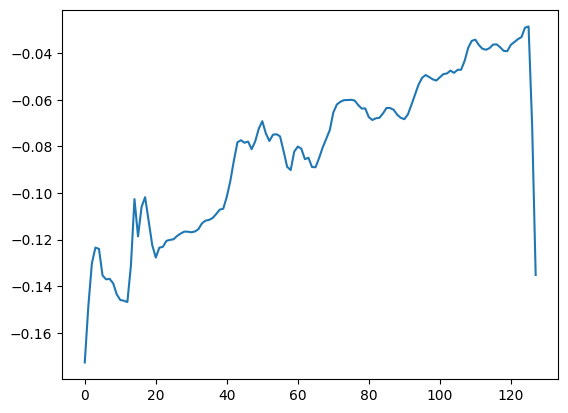

In [17]:
plt.plot(U[:,0:1])

In [18]:
deneme=U[:,0]
deneme=deneme/deneme.max()

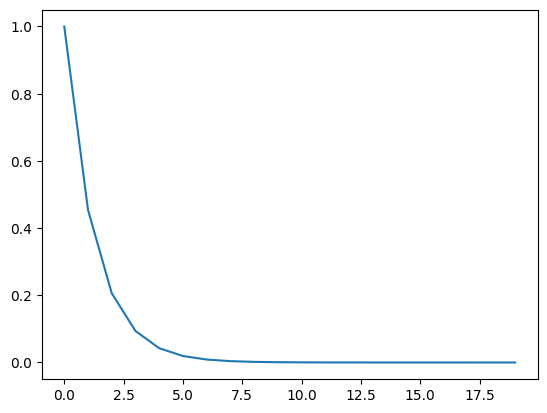

In [19]:
exp=np.exp(np.linspace(0,-15,20))
plt.plot(exp)

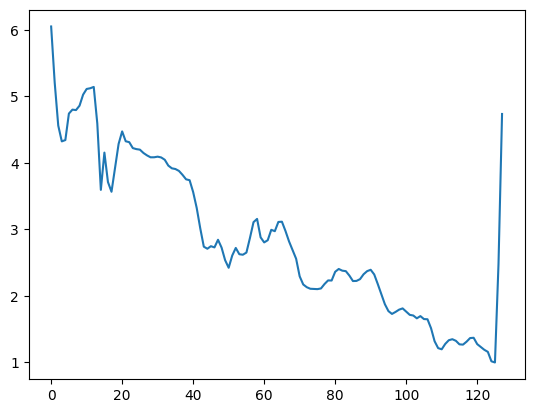

In [20]:
plt.plot(deneme)

([<matplotlib.lines.Line2D at 0x7f369ddede20>],
 [<matplotlib.lines.Line2D at 0x7f369ddff3d0>])

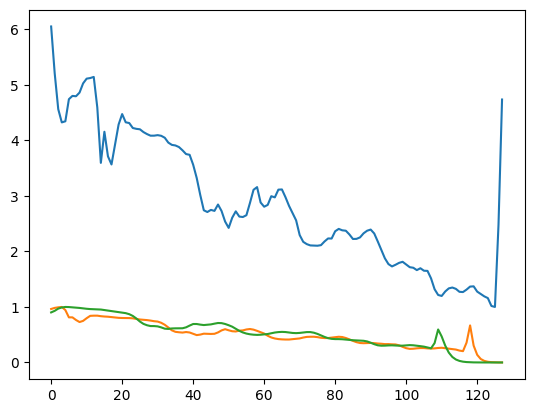

In [21]:
conv1=np.convolve(deneme,exp,mode='same')
conv2=np.convolve(conv1,exp,mode='same')
plt.plot(deneme),plt.plot(conv1/conv1.max()),plt.plot(conv2/conv2.max())

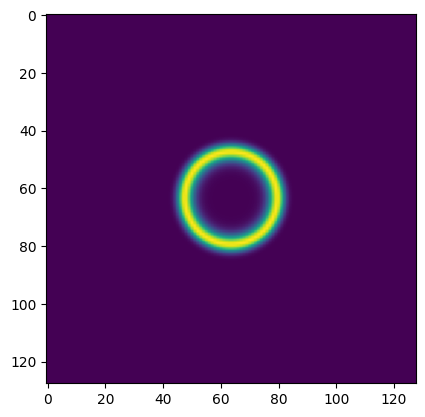

In [29]:
#CHECKING TO SEE IF CIRCULANTS ARE SHIFTING THE IMAGE | FFT(CIRCULANT)*CONV*FFT(X) ?SAME THING|EIGV_OF(CIRCULANT)*?*FFT(X)
flt=gaussian_filter2d(128,256,64)
plt.imshow(flt)

In [169]:
c=np.zeros(128)
c[10]=1
cir=sci.linalg.circulant(c)

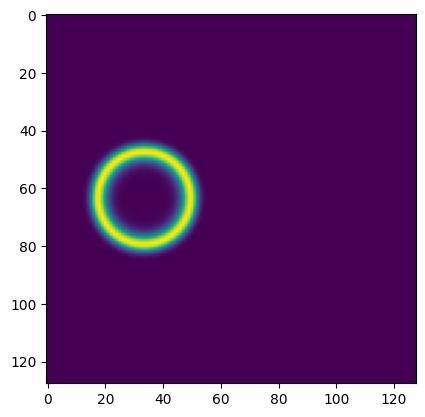

In [172]:
plt.imshow(flt@cir@cir@cir)

In [43]:
eigval_cir,eigvec_cir=sci.linalg.eig(cir)

([<matplotlib.lines.Line2D at 0x7f3691ca10a0>],
 [<matplotlib.lines.Line2D at 0x7f3691ca1640>])

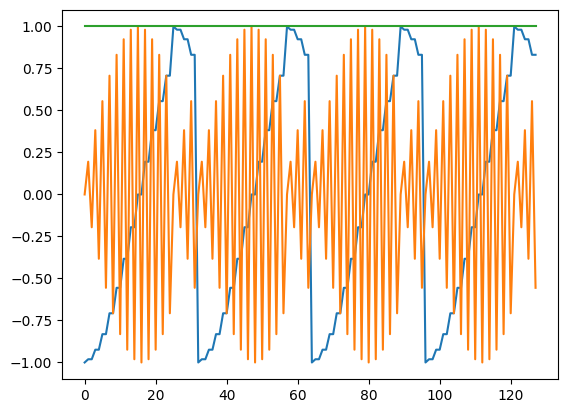

In [66]:
plt.plot(eigval_cir),plt.plot((np.imag(eigval_cir))),plt.plot(sci.linalg.norm(np.diag(eigval_cir),axis=0))

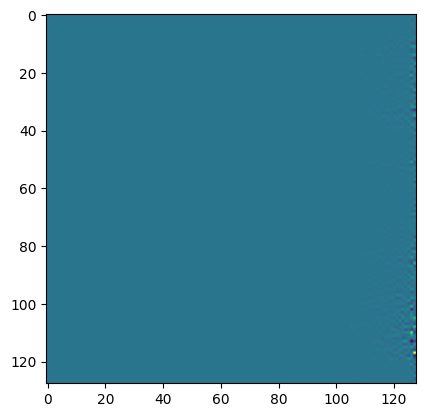

In [216]:
plt.imshow(np.linalg.pinv(d1cc)@U)

In [334]:
fft_img=sci.fft.fft2(d1cc)
flt=[math.pow(a,n) for n,a in enumerate(np.linspace(-1,0,128))]
fft_flt=(sci.fft.fft(flt))

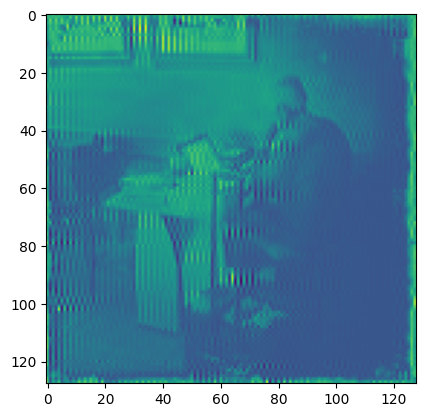

In [335]:
plt.imshow(np.real(sci.fft.ifft2(fft_img*fft_flt)))

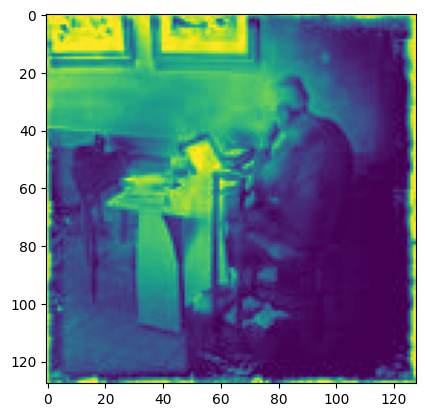

In [358]:
plt.plot(np.mean(d1cc/np.linalg.norm(d1cc)))

In [399]:
U_1,E_1,_=np.linalg.svd(d1cc-np.mean(d1cc,axis=0))

([<matplotlib.lines.Line2D at 0x7f36887cd040>],
 [<matplotlib.lines.Line2D at 0x7f36887cd310>])

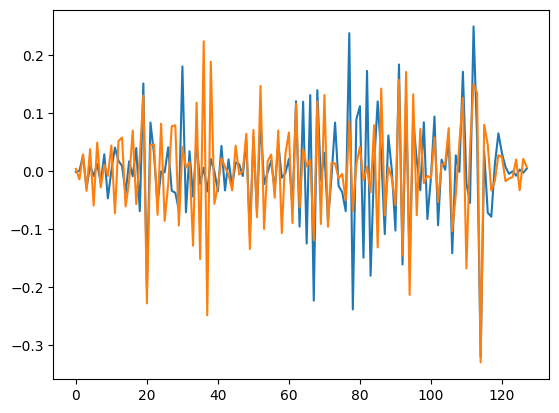

In [401]:
plt.plot(U_1[:,120]),plt.plot(-U[:,120])

In [62]:
x_1=np.atleast_2d(d1cc.flatten())-(np.mean(d1cc.flatten()))
x_2=np.atleast_2d(d2cc.flatten())-(np.mean(d2cc.flatten()))

In [63]:
A=np.concatenate((x_1,x_2),axis=0).T

In [64]:
U,E,VT=np.linalg.svd(A,full_matrices=False)

In [65]:
r1=(U[:,0:1]@np.array((E[0],0))@VT[0:1,:])

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

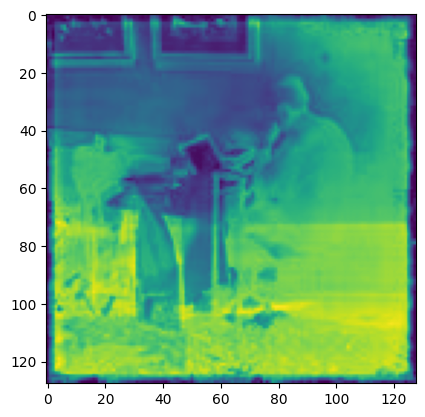

In [68]:

plt.imshow(U[:,0:1].reshape((128,128)))

In [17]:
c=np.zeros(128)
c[32]=1

In [18]:
cir1=sci.linalg.circulant(c).T #sagda saga on birim \ solda yukari 10 birim

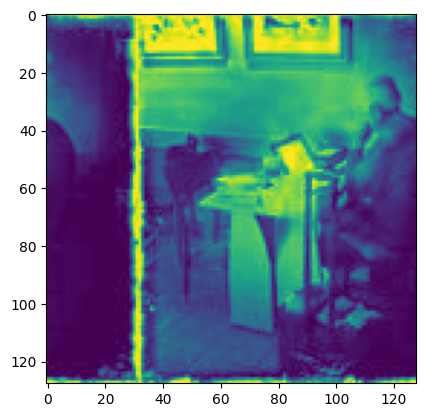

In [21]:
plt.imshow(d1cc@cir1)

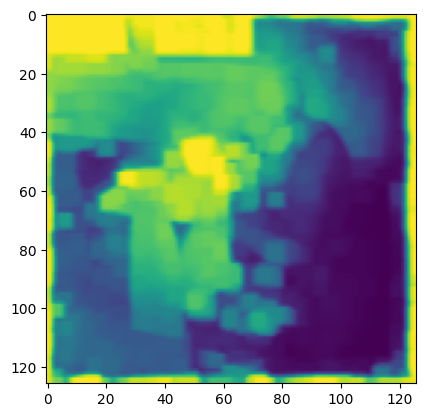

In [30]:
zero_order_hold=sci.ndimage.maximum_filter(d1cc,(5,5))
plt.imshow(convolve_2d(zero_order_hold,gaussian_filter2d(3)))


In [8]:
convolve_2d(gaussian_filter2d(3),d1cc)

ValueError: could not broadcast input array from shape (126,) into shape (1,)

In [9]:
flt=gaussian_filter2d(3)

In [10]:
in2=np.convolve(d1cc[1,:],flt[1,:],'valid')

In [13]:
in3=np.convolve(d1cc[2,:],flt[2,:],'valid')

In [16]:
(in3+in2).shape

(126,)

In [19]:
def convolve_2d(arr,flt):
    """
    filter designed to be 3x3
    """
    conv=np.empty(((arr.shape)[0]-2,(arr.shape)[1]-2))
    for i in (range(arr.shape[0]))[1:-1]:
        in1=np.convolve(arr[i-0,:],flt[0,:],'valid')
        in2=np.convolve(arr[i,:],flt[1,:],'valid')
        in3=np.convolve(arr[i+1,:],flt[2,:],'valid')
        conv[i-1,:]=(in1+in2+in3)
    return conv

In [17]:
 conv=np.empty(((d1cc.shape)[0]-2,(d1cc.shape)[1]-2))

In [18]:
conv.shape

(126, 126)

In [90]:
x=gaussian_filter2d(81,mean=0,sigma=20)
x[10:20,60:70]=x.max()

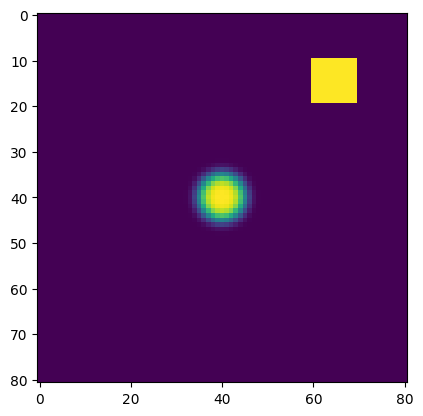

In [91]:
plt.imshow(x)

In [152]:
fftx=fft.fftshift(fft.fft2(x))
wx=np.concatenate(81*[fft.fftshift(np.atleast_2d(fft.fftfreq(81,2*np.pi/81)))],axis=0)
wy=np.concatenate(81*[fft.fftshift(np.atleast_2d(fft.fftfreq(81,2*np.pi/81))).T],axis=1)
w=np.sqrt(wx**2+wy**2)
#w=(wx+wy)/2
fftdf=fftx*w*1j
dfgaus_temp=fft.ifft2(fft.ifftshift(fftdf))
dfgaus=np.sqrt(dfgaus_temp.real**2+dfgaus_temp.imag**2)

In [176]:
wx.max()

6.366197723675814

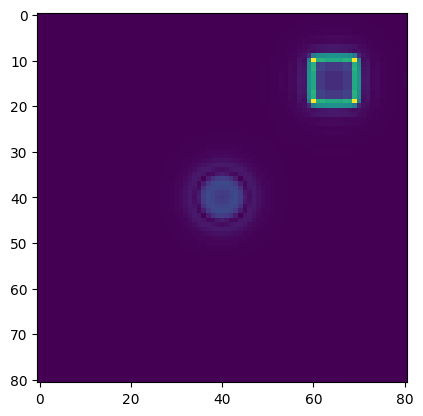

In [129]:
plt.imshow(dfgaus)

In [111]:
temp=(w-w.mean())/w.std()

In [116]:
temp.max()

2.217719402210465

In [168]:
fftx=fft.fftshift(fft.fft2(x))
wx=np.concatenate(81*[fft.fftshift(np.atleast_2d(fft.fftfreq(81,2*np.pi/81)))],axis=0)
wy=np.concatenate(81*[fft.fftshift(np.atleast_2d(fft.fftfreq(81,2*np.pi/81))).T],axis=1)
w=np.sqrt(wx**2+wy**2)
#w=(wx+wy)/2
fftdf=fftx*w*1j
dfgaus_temp=fft.ifft2(fft.ifftshift(fftdf))
dfgaus=np.sqrt(dfgaus_temp.real**2+dfgaus_temp.imag**2)

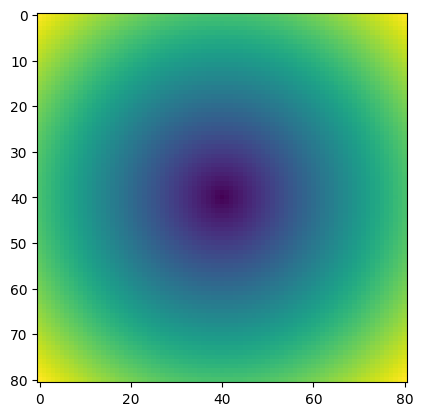

In [164]:
plt.imshow(w)